In [ ]:
#import python library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import warnings

In [10]:
df.shape

(1338, 7)

In [11]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['sex']=lab.fit_transform(df['sex'])
df['smoker']=lab.fit_transform(df['smoker'])
df['region']=lab.fit_transform(df['region'])

In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: xlabel='smoker', ylabel='count'>

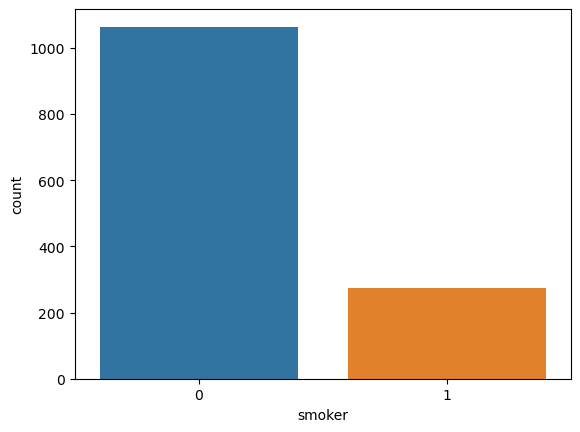

In [14]:
sns.countplot(x='smoker',data=df)

<Axes: xlabel='sex', ylabel='count'>

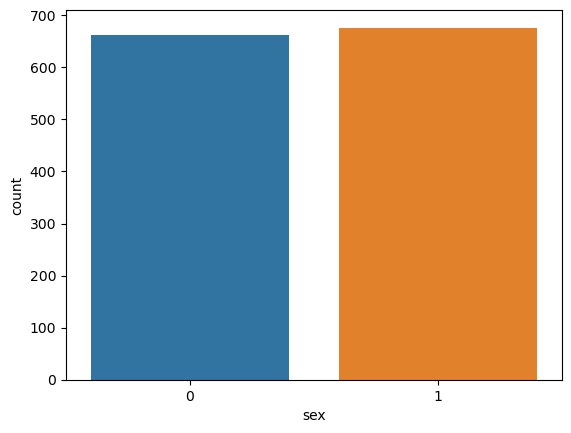

In [15]:
sns.countplot(x='sex',data=df)

<Axes: xlabel='region', ylabel='count'>

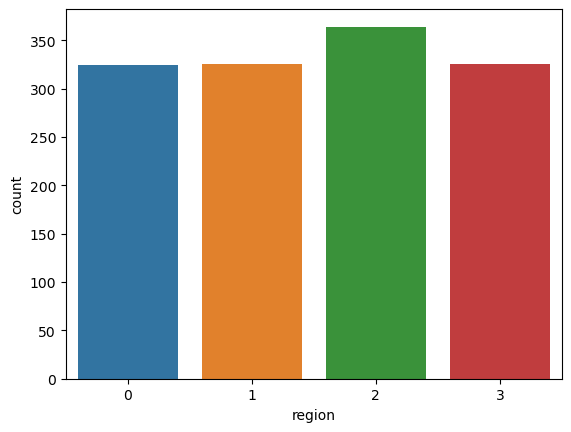

In [16]:
sns.countplot(x='region',data=df)

In [19]:
x=df.iloc[:,df.columns!='charges']
y=df.iloc[:,df.columns=='charges']
#x.shape
#x.head()
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.head()
ytrain.head()

,charges
1218,41661.60200
803,38792.68560
976,7804.16050
805,7731.85785
265,46151.12450


In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(xtrain,ytrain)

C:\Users\Guess\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=300, random_state=0)

In [24]:
y_pred=regressor.predict(xtest)
#y_pred

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("\n\nr2_score is " ,r2_score(y_pred,ytest))



r2_score is  0.840755027720739


In [26]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(xtrain,ytrain)
y_predict=alg.predict(xtest)
print("\n\nr2_score is " , r2_score(y_predict,ytest))



r2_score is  0.6940434128378943


In [27]:
from sklearn import tree
dt=tree.DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
x_predicted=dt.predict(xtest)
print("\n\nr2_score is " ,r2_score(x_predicted,ytest))



r2_score is  0.7575080224350914


In [32]:
test_vector=np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p=int(regressor.predict(test_vector)[0])
p

C:\Users\Guess\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


16936